In [18]:
import requests
import json
from geojson import Point, Feature, FeatureCollection, dump

import geopandas as gpd

from tqdm import tqdm
import glob


## OBS Daten von den jeweiligen Portalen (als geojson) exportieren

### Verfügbare Portale

* https://obs.adfc-brandenburg.de/
* https://obs.adfc-bw.de/
* https://obs.radentscheid-essen.de/
* https://portal.openbikesensor.org/
* https://obs.adfc-darmstadt.de/
* https://obs.adfc-osnabrueck.de/


* https://obs.adfc-ac.de/
* https://obs-portal.pub.solar/ (Köln)
* https://obs.adfc-luebeck.de/
* https://portal.1meter50.at/ (Österreich)
* https://portal.openbikesensor.hamburg 

neu
* https://obs.adfc-hessen.de/
* https://nantes.1metre.fr/


In [3]:
portale_list= \
['https://obs.adfc-brandenburg.de/',
 'https://obs.adfc-bw.de/',
 'https://obs.radentscheid-essen.de/',
 'https://portal.openbikesensor.org/',
 'https://obs.adfc-darmstadt.de/',
 'https://obs.adfc-osnabrueck.de/',

 'https://obs.adfc-ac.de/',
 'https://obs-portal.pub.solar/',
'https://obs.adfc-luebeck.de/',
'https://portal.1meter50.at/',
'https://portal.openbikesensor.hamburg/', 
'https://obs.adfc-hessen.de/',
'https://nantes.1metre.fr/' ]

In [4]:
#portale_list

In [5]:
#portale_list_str=[]
for p in portale_list:
    p_str=p.replace('https://','').replace('.de/','').replace('.org/','').replace('obs.','').replace('.pub.solar/','-koeln').replace('.','-').replace('/','')#.replace('-','_')
    print (p_str)
    #portale_list_str.append(p_str)

adfc-brandenburg
adfc-bw
radentscheid-essen
portal-openbikesensor
adfc-darmstadt
adfc-osnabrueck
adfc-ac
obs-portal-koeln
adfc-luebeck
portal-1meter50-at
portal-openbikesensor-hamburg
adfc-hessen
nantes-1metre-fr


In [267]:
#portale_list_str_ = ', '.join([str(elem) for elem in portale_list_str])
#portale_list_str_

In [14]:
datum="230503"

for p in tqdm(portale_list):
    url = p + "api/export/events?bbox=-0.19922377649033446,58.13748613913617,20.921758549385075,43.25705589043925&fmt=geojson"  #einfach riesiege bbbox fuer DACH
    
    # other bbox for france
    if p=="https://nantes.1metre.fr/":
        url = p + "api/export/events?bbox=-4.0938310596490215,48.7897019402069,0.08630978488054714,45.28213743625158&fmt=geojson"

    response = requests.request("GET", url)
    response_dict = json.loads(response.text)
    
    #p_str=p.replace('https://','').replace('.de/','').replace('.org/','').replace('obs.','').replace('.pub.solar/','-koeln')
    p_str=p.replace('https://','').replace('.de/','').replace('.org/','').replace('obs.','').replace('.pub.solar/','-koeln').replace('.','-').replace('/','')#.replace('-','_')

    with open('portale/'+datum+'_portalSnap_'+p_str+'.geojson', 'w') as f:
        dump(response_dict, f)

  0%|          | 0/1 [00:00<?, ?it/s]

https://nantes.1metre.fr/


100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


In [ ]:
#obs portal und obs brandnburg liern aktuell keine Daten

## Files einlesen

In [16]:
files = glob.glob(r'portale\*.geojson')
len(files)

13

In [22]:
import pandas as pd

In [23]:
gdf =gpd.GeoDataFrame()

for f in tqdm(files):
    gdf_this = gpd.read_file(f, crs='EPSG:4326')
    portal_name=f.split('_')[-1].replace('.geojson','')
    datum_stand=f.split('_')[0].replace('portale\\','')
    
    gdf_this['portal']= portal_name

    #gdf=gdf.append(gdf_this)
    gdf=pd.concat([gdf,gdf_this])
    
    print ("portal_name: " + portal_name)
    print ("Anzahl Datenpunkte: " + str(len(gdf_this)))
    print ("Stand vom: " + datum_stand)
    
                                        
print ("\nAnzahl Datenpunkte gesamt: "+ str(len(gdf)))

  8%|▊         | 1/13 [00:01<00:21,  1.78s/it]

portal_name: adfc-brandenburg
Anzahl Datenpunkte: 16410
Stand vom: 230201


 15%|█▌        | 2/13 [00:06<00:39,  3.58s/it]

portal_name: portal-openbikesensor
Anzahl Datenpunkte: 45780
Stand vom: 230201
portal_name: adfc-ac
Anzahl Datenpunkte: 597
Stand vom: 230503


 31%|███       | 4/13 [00:11<00:26,  2.92s/it]

portal_name: adfc-bw
Anzahl Datenpunkte: 46337
Stand vom: 230503


 38%|███▊      | 5/13 [00:14<00:22,  2.80s/it]

portal_name: adfc-darmstadt
Anzahl Datenpunkte: 23936
Stand vom: 230503


 46%|████▌     | 6/13 [00:14<00:14,  2.12s/it]

portal_name: adfc-hessen
Anzahl Datenpunkte: 5265
Stand vom: 230503


 54%|█████▍    | 7/13 [00:15<00:10,  1.70s/it]

portal_name: adfc-luebeck
Anzahl Datenpunkte: 6514
Stand vom: 230503


 62%|██████▏   | 8/13 [00:17<00:08,  1.70s/it]

portal_name: adfc-osnabrueck
Anzahl Datenpunkte: 14676
Stand vom: 230503


 69%|██████▉   | 9/13 [00:17<00:05,  1.26s/it]

portal_name: nantes-1metre-fr
Anzahl Datenpunkte: 1935
Stand vom: 230503


 77%|███████▋  | 10/13 [00:18<00:03,  1.18s/it]

portal_name: obs-portal-koeln
Anzahl Datenpunkte: 8642
Stand vom: 230503


 85%|████████▍ | 11/13 [00:19<00:02,  1.01s/it]

portal_name: portal-1meter50-at
Anzahl Datenpunkte: 5450
Stand vom: 230503


 92%|█████████▏| 12/13 [00:21<00:01,  1.40s/it]

portal_name: portal-openbikesensor-hamburg
Anzahl Datenpunkte: 20723
Stand vom: 230503


100%|██████████| 13/13 [00:23<00:00,  1.78s/it]

portal_name: radentscheid-essen
Anzahl Datenpunkte: 16209
Stand vom: 230503

Anzahl Datenpunkte gesamt: 212474


In [24]:
# Duplikate löschen, falls User Daten auf mehrere Portale geladen haben
gdf=gdf.drop_duplicates(subset=['distance_overtaker','time','geometry']).copy()
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
0,1.82,NaN,-1,28496022.0,1.913791,4.611111,2022-05-09 15:22:33+00:00,POINT (13.42786 52.47392),adfc-brandenburg
1,0.71,NaN,-1,28496022.0,1.927347,1.666667,2022-05-09 15:22:48+00:00,POINT (13.42766 52.47430),adfc-brandenburg
2,1.57,0.50,-1,849599088.0,1.934648,4.500000,2022-05-09 15:23:26+00:00,POINT (13.42738 52.47485),adfc-brandenburg
3,1.26,0.74,-1,568336446.0,1.878984,4.138889,2022-05-09 15:23:33+00:00,POINT (13.42746 52.47528),adfc-brandenburg
4,2.05,NaN,-1,816236476.0,2.021442,4.083333,2022-05-09 15:23:44+00:00,POINT (13.42769 52.47581),adfc-brandenburg
...,...,...,...,...,...,...,...,...,...
16204,1.51,NaN,-1,24805593.0,1.888571,6.472222,2023-04-22 12:29:23+00:00,POINT (6.22281 51.08792),radentscheid-essen
16205,1.44,NaN,-1,24805593.0,1.915008,5.944444,2023-04-22 12:29:28+00:00,POINT (6.22272 51.08815),radentscheid-essen
16206,1.75,NaN,-1,24805593.0,1.752409,7.166667,2023-04-22 12:29:48+00:00,POINT (6.22224 51.08942),radentscheid-essen
16207,2.09,NaN,-1,24448635.0,1.566606,6.944444,2023-04-28 15:19:58+00:00,POINT (6.19074 51.13236),radentscheid-essen


In [25]:
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib


get some shapes

<Axes: >

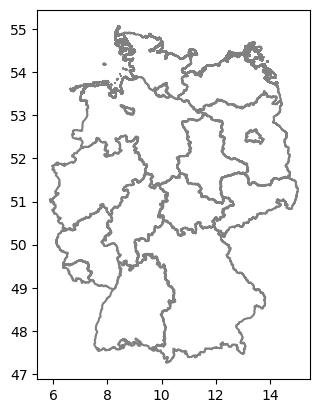

In [83]:
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland.boundary.plot(color='gray')

<Axes: >

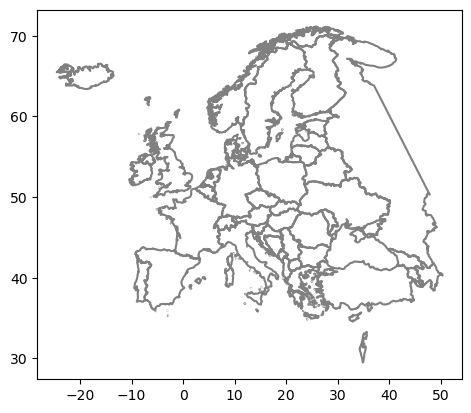

In [84]:
europe = gpd.read_file("https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON/europe.geojson")
europe.boundary.plot(color='gray')

In [71]:
europe_fil=europe[europe.NAME.isin(['Austria','Switzerland','Germany'])]#.boundary#.plot()   #,'France'

<Axes: >

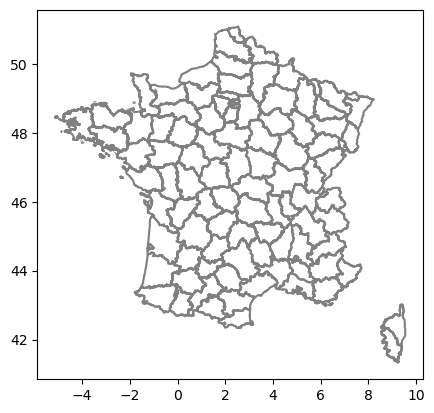

In [85]:
france = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson")
france.boundary.plot(color='gray')

In [86]:
nantes=france[france.nom=="Loire-Atlantique"]

In [132]:


# Function
def makeLayeredMap(*args):
    """This function accepts an arbitrary number of geodataframes, plots them on top of a Contextily basemap. 
    NOTE: Please edit the Plotting-section to specify parameters for the number of layers and the formatting of each layer.
    Output: Saved file and layered map for display."""
    
    # Convert the CRS for all layers to EPSG3857 to match Contextily
    args = list(map(lambda x: x.to_crs(epsg=3857), args))
    # Create figure
    fig, ax = plt.subplots(1, figsize=(15, 15))
    #Set aspect to equal
    ax.set_aspect('equal')
    
    
    
    # PLOTTING: Specify layers to plot how to format each layer (colours, transparency, etc.):
    
    # backroundshapes:
    args[0].plot(ax=ax,facecolor="grey", alpha=0.1, figsize=(15,15))
    args[0].plot(ax=ax,facecolor="none", alpha=1, edgecolor='grey', linewidths=0.6, figsize=(15,15))
    
    args[2].plot(ax=ax,facecolor="grey", alpha=0.1, figsize=(15,15))
    args[2].plot(ax=ax,facecolor="none", alpha=1, edgecolor='grey', linewidths=1.4, figsize=(15,15))
    
    args[3].plot(ax=ax,facecolor="grey", alpha=0.1, figsize=(15,15))
    args[3].plot(ax=ax,facecolor="none", alpha=1, edgecolor='grey', linewidths=1.4, figsize=(15,15))
    
    # Layer 2:
    args[1].plot(ax=ax, alpha=0.2, zorder=2, markersize=6, column='portal', cmap='tab10', legend=True, legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5),"title":"OBS-Data from:"}) #color='#0069B4',   # , "opacity":1
    
    
   # set alpha=1 for legend symbols
    for legend_handle in ax.get_legend().legend_handles:
        legend_handle.set_alpha(1)
 
    
    # Contextily basemap:
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) 
    #ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, reset_extent=False, zoom = 10) 

    # Turn off axis
    ax.axis('off')
    
   # ax.text(x=0.5, y=1.025, s='Measured overtaking events', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    #ax.text(x=0.5, y=0.92, s="OBS-Data: "+portale_list_str_+"ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(len(args[1])) + ", 2022-11-07)", fontsize=13, alpha=0.85, ha='center', va='bottom', transform=ax.transAxes)
   # ax.text(x=0.5, y=1.005, s="(n=" + str(len(args[1])) + ", 2023-05-03)", fontsize=13, alpha=0.85, ha='center', va='bottom', transform=ax.transAxes)

    ax.text(x=0.5, y=1.09, s='Erfasste Überholvorgänge im OBS Projekt', fontsize=24, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    #ax.text(x=0.5, y=0.92, s="OBS-Data: "+portale_list_str_+"ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(len(args[1])) + ", 2022-11-07)", fontsize=13, alpha=0.85, ha='center', va='bottom', transform=ax.transAxes)
    ax.text(x=0.5, y=1.014, s="OBS-Daten: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück, \nADFC Aachen, OBS-Portal Köln, ADFC Lübeck, OBS-Portal 1meter50, OBS-Portal Hamburg, OBS-Portal Hessen, OBS-Portal Nantes:  \n(n=" + (f"{len(args[1]):,}").replace(",",".") + ", Stand 03.05.2023)", fontsize=12, alpha=0.85, ha='center', va='bottom', transform=ax.transAxes)

    ax.text(x=1, y=-0.03, s="Erstellt von TH Wildau - FG Radverkehr", fontsize=10, alpha=0.85, ha='right', va='bottom', transform=ax.transAxes)

    
    
    layered_map = plt.show()
    
    #fig.savefig("plots\OBS_analysis_map_Deutschland_80dpi.png", dpi=80)
    fig.savefig("plots\OBS_analysis_map_europe_colored_80dpi_230503.png", dpi=80, bbox_inches="tight") 
    return(layered_map)

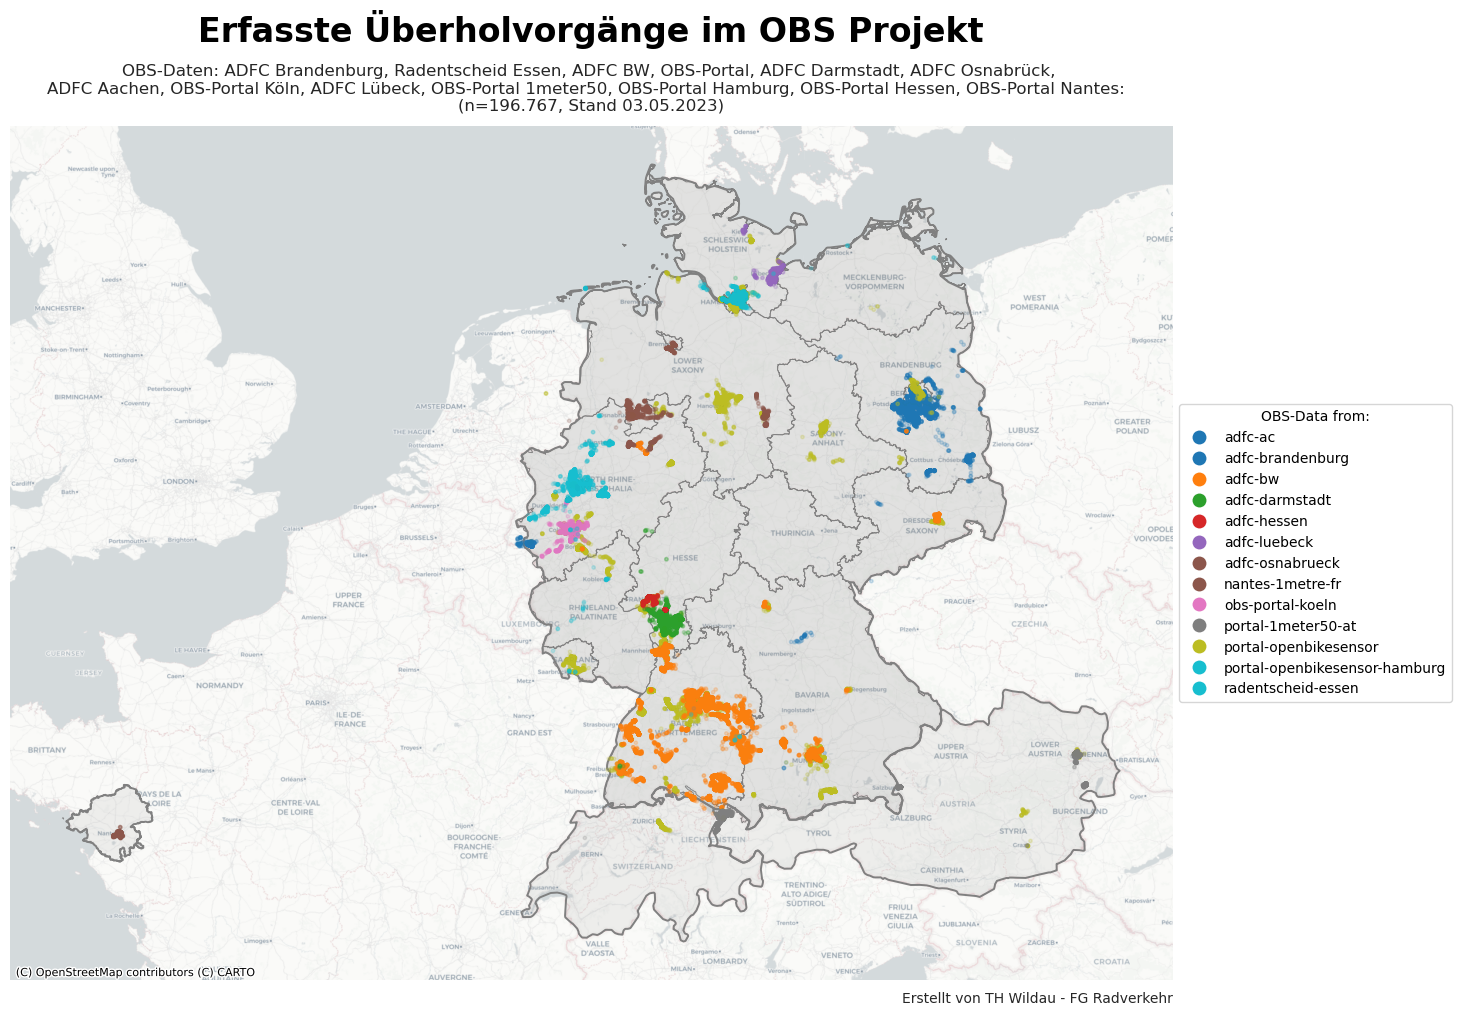

In [133]:
#makeLayeredMap(bland,gdf)
makeLayeredMap(bland,gdf,europe_fil,nantes)

#### by month

In [124]:
gdf['month'] = gdf['time'].dt.month.astype(str)
gdf['year'] = gdf['time'].dt.year.astype(str)

In [125]:
gdf['year_month'] = gdf['year'] + "_0" + gdf['month']

In [126]:
gdf['year_month']=gdf['year_month'].str[:5] + gdf['year_month'].str[-2:]

<Axes: xlabel='year,month'>

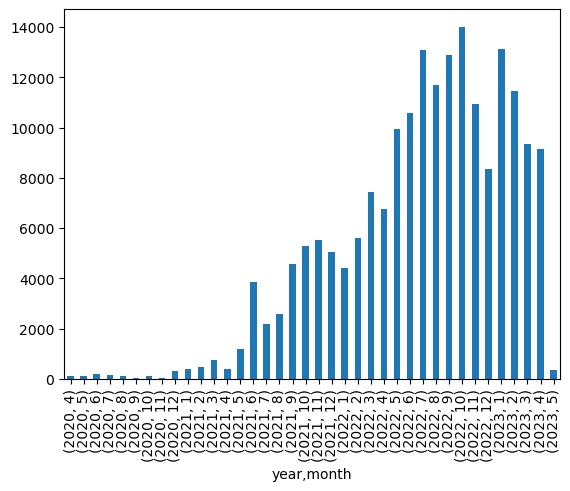

In [127]:
gdf['month'] = gdf['time'].dt.month.astype(int)
gdf.groupby(['year','month'])['distance_overtaker'].count().plot(kind='bar')

In [128]:
stacked_bar_plot=gdf.groupby(['portal','year_month'])['distance_overtaker'].count()

In [129]:
stacked_bar_plot

portal              year_month
adfc-ac             2022_07        39
                    2022_08        21
                    2022_09        44
                    2022_10        28
                    2022_11        40
                                 ... 
radentscheid-essen  2023_01       658
                    2023_02       752
                    2023_03       820
                    2023_04       233
                    2023_05         1
Name: distance_overtaker, Length: 238, dtype: int64

In [130]:
stacked_bar_plot.reset_index()

,portal,year_month,distance_overtaker
0,adfc-ac,2022_07,39
1,adfc-ac,2022_08,21
2,adfc-ac,2022_09,44
3,adfc-ac,2022_10,28
4,adfc-ac,2022_11,40
...,...,...,...
233,radentscheid-essen,2023_01,658
234,radentscheid-essen,2023_02,752
235,radentscheid-essen,2023_03,820
236,radentscheid-essen,2023_04,233


In [131]:
import altair as alt

source = stacked_bar_plot.reset_index()

alt.Chart(source).mark_bar().encode(
    x='year_month',
    y=alt.Y('sum(distance_overtaker)', title="number of overtaking events"),
    color='portal',
)

alt.Chart(...)